#                                      E-com Project

In [ ]:
# importing liberies 

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix  # for checking score
from sklearn.model_selection import train_test_split  # spliting data
from imblearn.over_sampling import RandomOverSampler     #for oversampling the data cause data is imbalacned
import seaborn as sns                                 #visualization
import matplotlib.pyplot as plt

In [3]:
#importing the data set 

df =  pd.read_csv("train_data.csv")

In [4]:
df.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [3]:
#getting the only features which are needed i.e `review` and `sentiment` column
df = df[["reviews.title","sentiment"]] 

In [4]:
X= df["reviews.title"]   #independent feature
y= df["sentiment"]        #label

In [5]:
#seeing the data how imbalnce it is
df["sentiment"].value_counts()     

Positive    3749
Neutral      158
Negative      93
Name: sentiment, dtype: int64

In [185]:
#droping nan values
df.dropna(inplace=True)

In [187]:
#DROPED NAN VALUES

In [186]:
df.isna().sum()

reviews.title    0
sentiment        0
dtype: int64

In [15]:
#oversampling the data 
os =RandomOverSampler(sampling_strategy="all",random_state=4)

In [16]:
#fitting the data
X_trian_ns ,y_train_ns =os.fit_resample(df,y)   

c:\users\manoj\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

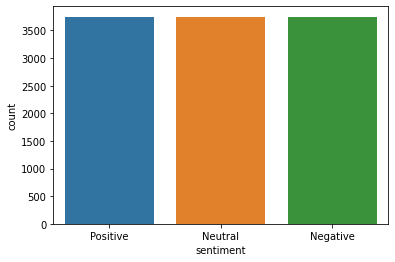

In [17]:
#visualize the data now the data is balanced
sns.countplot(X_trian_ns["sentiment"])

In [18]:
# importing the required lib for preprocessing the text data 
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import re

### porter stemmer is a process for removing the commoner morphological and inflexional endings from words in English. Its main use is as part of a term normalisation process that is usually done when setting up Information Retrieval systems.

In [ ]:
stemmer = PorterStemmer()
english_stopwords = stopwords.words('english')

### Now  preprocessing the text data removing no.s , punctuations , making the text lowercase, removing stopwords..!!

In [20]:
def text_preprocess(text):
    # remove no.s
    text_1 = [re.sub("[0-9]","",str(text))]
    
    # remove punctuations
    text_1 = [char for char in text_1 if char not in string.punctuation]
    text_1 = "".join(text_1)
    
    # make lowercase
    text_2 = text_1.lower()
    
    # remove stopwords
    text_3 = [word for word in text_2.split() if word not in english_stopwords]
    text_3 = " ".join(text_3)
    
    # apply stemming
    text_4 = [stemmer.stem(word) for word in text_3.split()]
    text_4 = " ".join(text_4)
    
    return (text_4)

In [21]:
#now the text data will go into the function `text_preprocess` and do preprocessing
X_trian_ns["reviews.title_new"]=X_trian_ns["reviews.title"].apply(text_preprocess)

### TfidfVectorizer is the base building block of many NLP pipelines. It is a simple technique to vectorize text documents i.e. transform sentences into arrays of numbers  and use them in subsequent tasks.

In [22]:
tfidf= TfidfVectorizer()

In [31]:
#fiting and tranforming the text into numbers
t=tfidf.fit_transform(X_trian_ns["reviews.title_new"].to_numpy(),X_trian_ns["sentiment"])

In [32]:
t.shape

(11247, 1073)

In [99]:
#using GaussianNB ,MultinomialNB model 
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [35]:
nb = GaussianNB()

In [38]:
nb.fit(t.todense(),X_trian_ns["sentiment"])

GaussianNB()

In [40]:
#checking the training score
nb.score(t.todense(),X_trian_ns["sentiment"])

0.737885658397795

# now fr testing

In [51]:
df_test = pd.read_csv("test_data_hidden.csv")

##### Now preprocessing  the test - text data removing no.s , punctuations , making the text lowercase, removing stopwords..!

In [53]:
def text_preprocess(text):
    # remove no.s
    text_1 = [re.sub("[0-9]","",str(text))]
    
    # remove punctuations
    text_1 = [char for char in text_1 if char not in string.punctuation]
    text_1 = "".join(text_1)
    
    # make lowercase
    text_2 = text_1.lower()
    
    # remove stopwords
    text_3 = [word for word in text_2.split() if word not in english_stopwords]
    text_3 = " ".join(text_3)
    
    # apply stemming
    text_4 = [stemmer.stem(word) for word in text_3.split()]
    text_4 = " ".join(text_4)
    
    return (text_4)

In [54]:
#now the text data will go into the function `text_preprocess` and do preprocessing
df_test["reviews.title_new"]=df_test["reviews.title"].apply(text_preprocess)

In [55]:
#independent variable
X_test = df_test["reviews.title_new"]   

In [56]:
#transform text into no.s
t_test = tfidf.transform(X_test)

In [58]:
#predicting with naive baies
pred=nb.predict(t_test.todense())

In [66]:
recall_score(df_test["sentiment"],pred,average=None)  #checking the recall score and index(2) is the weighted score

array([0.66666667, 0.38461538, 0.47705443])

In [69]:
#for false -ve and false +ve
confusion_matrix(df_test["sentiment"],pred)

array([[ 16,   1,   7],
       [ 16,  15,   8],
       [278, 212, 447]], dtype=int64)

In [71]:
f1_score(df_test["sentiment"],pred,average=None)  #checking the f1 score and index(2) is the weighted score

array([0.09580838, 0.11235955, 0.63902788])

# done with  naive now with random forest and xgbosst


# random forest 

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rfc = RandomForestClassifier()

In [76]:
rfc.fit_transform(t.todense(),X_trian_ns["sentiment"]) 

RandomForestClassifier()

In [78]:
rfc.score(t.todense(),X_trian_ns["sentiment"]) #checking the traing score

0.9484306926291456

In [79]:
rdf_pred=rfc.predict(t_test.todense()) #doing prediction of test data

In [82]:
#for false -ve and false +ve
confusion_matrix(df_test["sentiment"],rdf_pred)

array([[  9,   5,  10],
       [  2,  15,  22],
       [ 15,  54, 868]], dtype=int64)

In [84]:
precision_score(df_test["sentiment"],rdf_pred,average=None) #checking the precision score and index(2) is the weighted score

array([0.34615385, 0.2027027 , 0.96444444])

In [85]:
recall_score(df_test["sentiment"],rdf_pred,average=None)  #checking the recall score and index(2) is the weighted score

array([0.375     , 0.38461538, 0.92636073])

In [86]:
f1_score(df_test["sentiment"],rdf_pred,average=None) #checking the f1score and index(2) is the weighted score

array([0.36      , 0.26548673, 0.94501905])

# XGBOOST

In [91]:
from  xgboost import  XGBClassifier 

In [92]:
xgb =XGBClassifier()

In [93]:
xgb.fit_transform(t.todense(),X_trian_ns["sentiment"])

c:\users\manoj\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:42:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [94]:
xgb.score(t.todense(),X_trian_ns["sentiment"])

0.9387392193473815

In [95]:
xgb_pred=xgb.predict(t_test.todense())

In [96]:
confusion_matrix(df_test["sentiment"],xgb_pred)

array([[ 10,   4,  10],
       [  3,  16,  20],
       [ 15,  49, 873]], dtype=int64)

In [97]:
precision_score(df_test["sentiment"],xgb_pred,average=None)

array([0.35714286, 0.23188406, 0.96677741])

In [98]:
f1_score(df_test["sentiment"],xgb_pred,average=None)

array([0.38461538, 0.2962963 , 0.94891304])

### for multinomialNB

In [103]:
m_nb= MultinomialNB(alpha=0.01,)

In [104]:
m_nb.fit_transform(t.todense(),X_trian_ns["sentiment"])

MultinomialNB(alpha=0.01)

In [105]:
m_nb.score(t.todense(),X_trian_ns["sentiment"])

0.8542722503778786

In [106]:
nb_pred= nb.predict(t_test.todense())

In [107]:
confusion_matrix(df_test["sentiment"],nb_pred)

array([[ 16,   1,   7],
       [ 16,  15,   8],
       [278, 212, 447]], dtype=int64)

In [108]:
precision_score(df_test["sentiment"],nb_pred,average=None)

array([0.0516129 , 0.06578947, 0.96753247])

In [109]:
f1_score(df_test["sentiment"],nb_pred,average=None)

array([0.09580838, 0.11235955, 0.63902788])

###  ANN neural network

In [110]:
from  tensorflow.keras.layers import Dense 
from tensorflow.keras import Sequential

In [142]:
from sklearn.preprocessing import LabelEncoder

In [145]:
y=LabelEncoder().fit_transform(X_trian_ns["sentiment"])

In [160]:
pd.get_dummies(X_trian_ns["sentiment"])

,Negative,Neutral,Positive
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
11242,0,1,0
11243,0,1,0
11244,0,1,0
11245,0,1,0


In [148]:
model = Sequential([
    Dense(units =128,kernel_initializer= "he_uniform",activation='relu',input_dim=1073),
    Dense(units =64,kernel_initializer= "he_uniform",activation='relu'),
    Dense(units= 3,activation="softmax")
])

<IPython.core.display.Javascript object>

In [151]:
model.compile("adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [152]:
model.fit(t.toarray(),y, batch_size=32,
    epochs=10,
    verbose=1)

Epoch 1/10
352/352 [==============================] - 2s 4ms/step - loss: 0.8060 - accuracy: 0.6153
Epoch 2/10
352/352 [==============================] - 1s 4ms/step - loss: 0.3599 - accuracy: 0.8985
Epoch 3/10
352/352 [==============================] - 1s 4ms/step - loss: 0.2820 - accuracy: 0.9154
Epoch 4/10
352/352 [==============================] - 1s 4ms/step - loss: 0.2477 - accuracy: 0.9257
Epoch 5/10
352/352 [==============================] - 1s 4ms/step - loss: 0.2272 - accuracy: 0.9317
Epoch 6/10
352/352 [==============================] - 1s 4ms/step - loss: 0.2113 - accuracy: 0.9379
Epoch 7/10
352/352 [==============================] - 1s 4ms/step - loss: 0.2012 - accuracy: 0.9389
Epoch 8/10
352/352 [==============================] - 1s 4ms/step - loss: 0.1923 - accuracy: 0.9403
Epoch 9/10
352/352 [==============================] - 1s 4ms/step - loss: 0.1876 - accuracy: 0.9402
Epoch 10/10
352/352 [==============================] - 1s 4ms/step - loss: 0.1815 - accuracy: 0.9421

In [153]:
ann_pred=model.predict(t_test.todense())

In [168]:
type(ann_pred[15].argmax())

numpy.int64

In [178]:
l1=[]
for i in ann_pred:
    i=i.argmax()
    if i==2:
        i="Positive"
        l1.append(i)
    if i==0:
        i="Negative"
        l1.append(i)
    if i==1:
        i="Neutral"
        l1.append(i)
    

In [174]:
ann_pred_array=np.array(l1)

In [176]:
f1_score(df_test["sentiment"],ann_pred_array,average=None)

array([0.3125    , 0.25423729, 0.94169417])

In [177]:
precision_score(df_test["sentiment"],ann_pred_array,average=None)

array([0.25      , 0.18987342, 0.97162316])

In [179]:
confusion_matrix(df_test["sentiment"],ann_pred_array)

array([[ 10,   7,   7],
       [  6,  15,  18],
       [ 24,  57, 856]], dtype=int64)

# using LSTM

In [197]:
from tensorflow.keras.layers import Embedding,Dropout,Dense,LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import  one_hot
from nltk import corpus

In [198]:
voc_size = 10000

In [200]:
one = [one_hot(word,voc_size) for word in X_trian_ns["reviews.title_new"]]

In [203]:
sen_max=[]
for j in  X_trian_ns["reviews.title_new"]:
    j=j.split(" ")
    
    sen_max.append((len(j)))

In [204]:
max(sen_max)

11

In [208]:
emb_doc=pad_sequences(one,
    maxlen=12,
    dtype='int32',
    padding='pre',
    truncating='pre',
    value=0.0,)

In [210]:
embed_feature = 100
model = Sequential([
Embedding(input_dim=voc_size,
    output_dim=embed_feature,
    embeddings_initializer="uniform",
    embeddings_regularizer=None,
    activity_regularizer=None,
    embeddings_constraint=None,
    mask_zero=False,
    input_length=12),
LSTM(units=100,
    activation="tanh",
    recurrent_activation="sigmoid",
    use_bias=True,
    kernel_initializer="glorot_uniform",
    recurrent_initializer="orthogonal",
    bias_initializer="zeros",
    unit_forget_bias=True,
    kernel_regularizer=None,
    recurrent_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    time_major=False,
    unroll=False),
Dense(units =128,kernel_initializer= "he_uniform",activation='relu'),
Dense(units =64,kernel_initializer= "he_uniform",activation='relu'),
     Dense(units= 3,activation="softmax")
])

model.compile("adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [211]:
model.fit(emb_doc,y, batch_size=32,
    epochs=10,
    verbose=1)

Epoch 1/10
352/352 [==============================] - 17s 35ms/step - loss: 0.4703 - accuracy: 0.8061
Epoch 2/10
352/352 [==============================] - 12s 36ms/step - loss: 0.2445 - accuracy: 0.9031
Epoch 3/10
352/352 [==============================] - 12s 35ms/step - loss: 0.1897 - accuracy: 0.9211
Epoch 4/10
352/352 [==============================] - 12s 35ms/step - loss: 0.1605 - accuracy: 0.9346
Epoch 5/10
352/352 [==============================] - 12s 35ms/step - loss: 0.1489 - accuracy: 0.9381
Epoch 6/10
352/352 [==============================] - 13s 36ms/step - loss: 0.1394 - accuracy: 0.9385
Epoch 7/10
352/352 [==============================] - 12s 35ms/step - loss: 0.1358 - accuracy: 0.9414
Epoch 8/10
352/352 [==============================] - 12s 35ms/step - loss: 0.1311 - accuracy: 0.9409
Epoch 9/10
352/352 [==============================] - 12s 35ms/step - loss: 0.1282 - accuracy: 0.9429
Epoch 10/10
352/352 [==============================] - 12s 35ms/step - loss: 0.128

In [212]:
one_test = [one_hot(word,voc_size) for word in  X_test]

In [213]:
emb_doc_test=pad_sequences(one_test,
    maxlen=12,
    dtype='int32',
    padding='pre',
    truncating='pre',
    value=0.0,)

In [217]:
y_test=LabelEncoder().fit_transform(df_test["sentiment"])

In [220]:
y_test

array([2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,

In [221]:
emb_doc_test

array([[   0,    0,    0, ...,    0, 3924, 9026],
       [   0,    0,    0, ..., 1821, 6332,  289],
       [   0,    0,    0, ..., 9940, 1490, 1407],
       ...,
       [   0,    0,    0, ..., 7273, 3911, 8576],
       [   0,    0,    0, ..., 2038, 9871, 1244],
       [   0,    0,    0, ...,    0, 2377, 6057]])

In [223]:
lstm_pred=model.predict(emb_doc_test)

In [224]:
l2=[]
for i in lstm_pred:
    i=i.argmax()
    if i==2:
        i="Positive"
        l2.append(i)
    if i==0:
        i="Negative"
        l2.append(i)
    if i==1:
        i="Neutral"
        l2.append(i)

In [226]:
lstm_pred_array=np.array(l2)

In [227]:
confusion_matrix(df_test["sentiment"],lstm_pred_array)

array([[ 10,   5,   9],
       [  4,  13,  22],
       [ 27,  47, 863]], dtype=int64)

In [230]:
f1_score(df_test["sentiment"],lstm_pred_array,average="weighted")

0.9004016825610216

# got best accuracy of lstm is 90%